<a href="https://colab.research.google.com/github/davidclizbe/datascience/blob/master/Clizbe_Dimensionality_Reduction_With_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sklearn.metrics import silhouette_score

In [ ]:
from sklearn.datasets import fetch_openml

Load the dataset and make your preprocessing like normalizing the data.

In [ ]:
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)
mnist

{'DESCR': "**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  \n**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  \n**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  \n\nFashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. \n\nRaw data available at: https://github.com/zalandoresearch/fashion-mnist\n\n### Target classes\nEach training and test example is assigned to one of the following labels:\nLabel  Description  \n0  T-shirt/top  \n1  Trouser  \n2  P

Apply PCA to the data and get the first two principal components.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

In [ ]:
import sklearn
sklearn.__version__

'0.22.2.post1'

In [ ]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [ ]:
np.random.seed(123)

indices = np.random.choice(70000,10000)
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


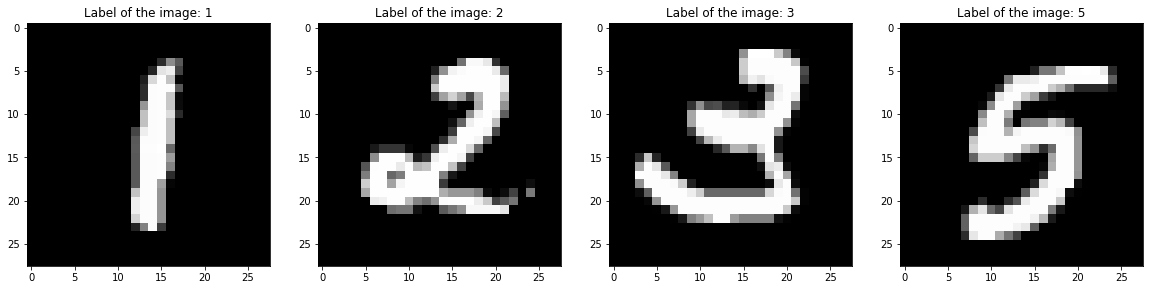

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[123]))

plt.subplot(142)
plt.imshow(X[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[124]))

plt.subplot(143)
plt.imshow(X[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[125]))

plt.subplot(144)
plt.imshow(X[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y[126]))

plt.show()

Using the first two principal components, draw a graph of the data by coloring and labeling the data points as we did in the checkpoint.


In [ ]:
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X)

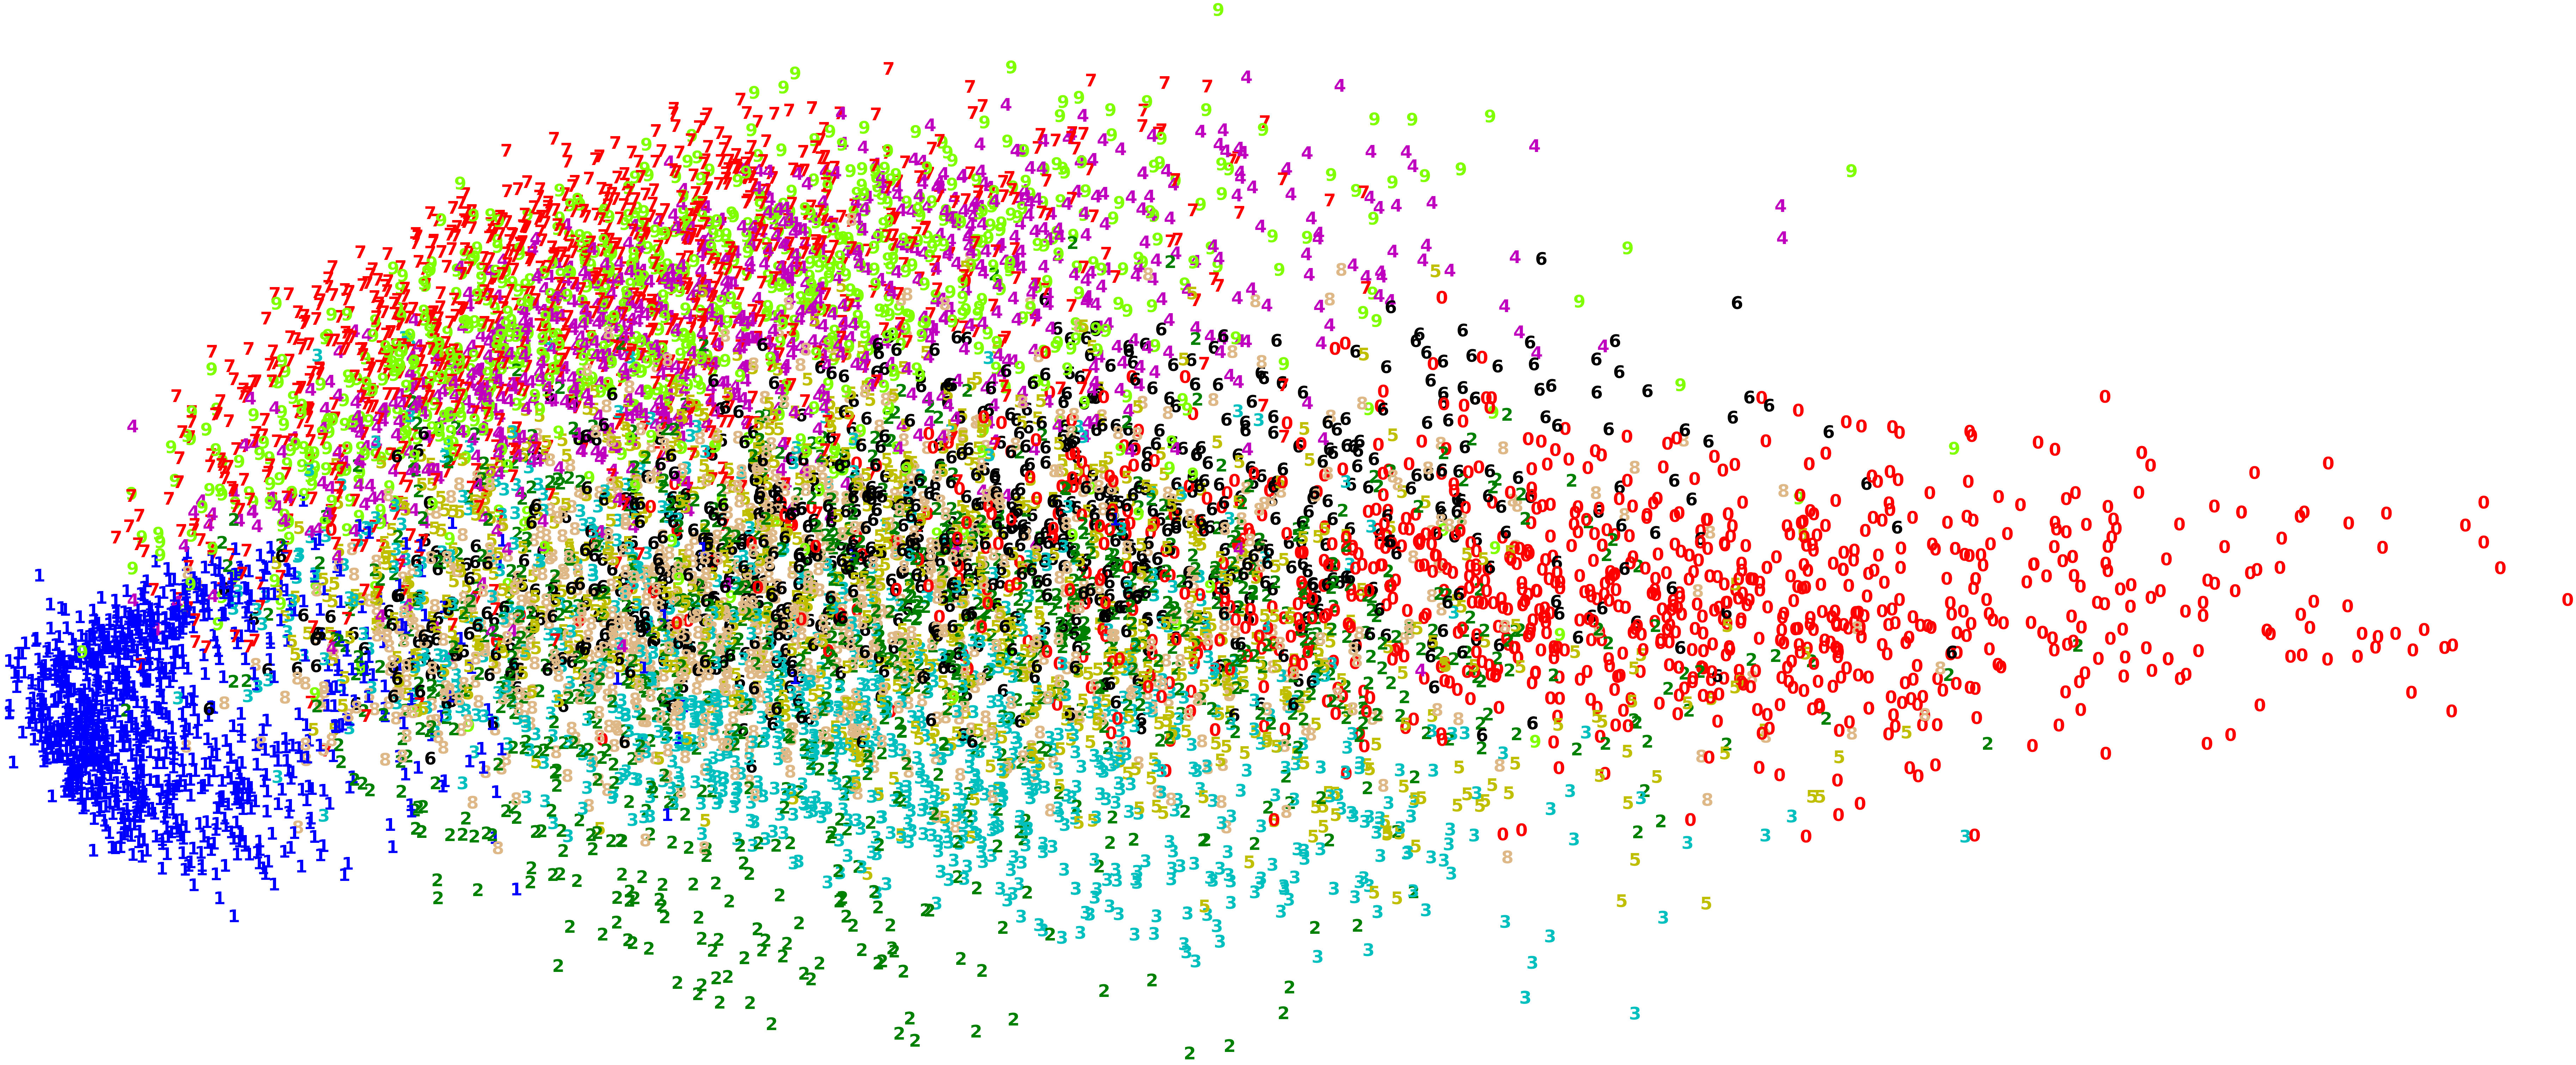

In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

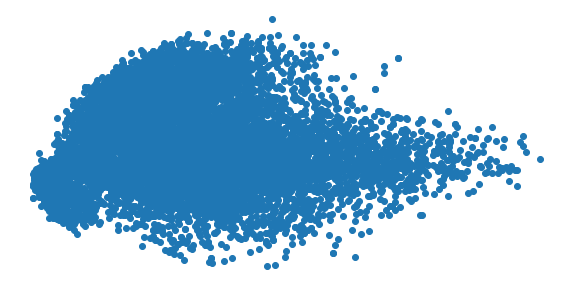

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Do you think PCA solution is satisfactory? Can you distinguish between different classes easily?